# Importing Libraries

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set()

# Data Preprocessing

## Reading Dataset

In [ ]:
# Data Reading
df = pd.read_csv('flower_dataset.csv')
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


## Dropping Irrelevant Features

In [ ]:
#dropping irrelevant feature like "id"
df.drop(['id'], axis = 1,inplace=True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229317,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


## Feature Scaling - Normalizing Dataset

In [ ]:
#normalizing the dataset
col_names = np.array(df.columns)
col_names = col_names[:-1]
for i in col_names:
    col = np.array(df[i])
    mean_col = np.mean(col)
    std_col = np.std(col)
    norm_col = []
    for j in col:
        norm_col.append((j-mean_col)/std_col)
    df[i] = norm_col
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800,jasmine
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418,jasmine
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950,jasmine
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690,jasmine
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645,jasmine
...,...,...,...,...,...,...,...,...,...,...,...
18180,-0.806657,-0.246943,-0.872502,0.778548,-0.810816,-0.788051,-1.130973,-0.632104,-0.661944,0.720875,Gonen
18181,0.373857,1.447410,-0.165603,0.784700,0.386282,0.417903,0.295131,1.149128,-0.990018,0.730936,Gonen
18182,-0.457683,0.250187,-0.685768,0.796550,-0.462606,-0.414880,-0.530388,-0.317085,-0.373899,0.750451,Gonen
18183,-0.733727,-0.022853,-0.828242,0.818359,-0.690307,-0.708755,-1.190322,-0.279187,-1.081165,0.786835,Gonen


## Label Encoding

In [ ]:
#LabelEncoding the target variable
df['Class'] = pd.factorize(df['Class'])[0]
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,-1.703630,-4.803744,0.417927,-6.393938,-1.696989,-1.830049,0.391654,-2.661778,0.839588,-2.663800,0
1,-2.838478,-6.220789,-0.835611,-6.209583,-2.803539,-3.398143,0.923070,-4.857318,1.837215,-2.635418,0
2,-2.718519,-6.091404,-0.771700,-6.024520,-2.725641,-3.213879,1.365122,-4.799860,2.383587,-2.605950,0
3,-2.701479,-6.031573,-0.783130,-5.781578,-2.708996,-3.188141,1.598635,-4.777995,2.409877,-2.565690,0
4,-2.278893,-5.377799,-0.341288,-5.433479,-2.279559,-2.580390,1.463045,-4.111042,2.477331,-2.504645,0
...,...,...,...,...,...,...,...,...,...,...,...
18180,-0.806657,-0.246943,-0.872502,0.778548,-0.810816,-0.788051,-1.130973,-0.632104,-0.661944,0.720875,1
18181,0.373857,1.447410,-0.165603,0.784700,0.386282,0.417903,0.295131,1.149128,-0.990018,0.730936,1
18182,-0.457683,0.250187,-0.685768,0.796550,-0.462606,-0.414880,-0.530388,-0.317085,-0.373899,0.750451,1
18183,-0.733727,-0.022853,-0.828242,0.818359,-0.690307,-0.708755,-1.190322,-0.279187,-1.081165,0.786835,1


## Shuffling Dataset

In [ ]:
df = df.sample(frac=1)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
41,-2.294569,-4.805067,-0.790767,-2.893782,-2.299532,-2.601979,1.152399,-3.934702,1.832204,-1.887386,0
14890,0.942304,0.344343,1.006444,-0.706604,0.923578,0.949084,-0.113421,0.601667,1.002826,-0.849153,1
5199,-0.726911,-0.089037,-0.853867,0.816735,-0.727592,-0.701381,0.353279,-0.481934,-0.727194,0.784105,0
5917,-0.421559,0.450639,-0.702729,0.872792,-0.459277,-0.377122,-1.370575,-0.108304,-0.647883,0.880405,0
11197,-1.992625,-0.925956,-2.112887,1.506537,-1.885408,-2.197358,-1.543017,-1.656517,-2.140352,2.388012,0
...,...,...,...,...,...,...,...,...,...,...,...
10715,-0.544245,1.202918,-1.153565,1.367427,-0.568467,-0.506000,-1.470313,0.347123,-1.623928,1.969965,0
3047,-1.051348,-0.830716,-0.939216,0.622302,-1.049836,-1.059539,1.720327,-1.152277,-0.350917,0.480210,0
1770,-1.026811,-0.923027,-0.801064,0.459294,-0.973936,-1.031922,-0.960976,-1.146514,-0.295238,0.255983,0
6157,-0.984553,-0.326270,-1.047677,0.892151,-0.991912,-0.984569,-1.235313,-0.830885,-0.760802,0.914672,0


## Reducing Dataset to 2 dimensions for visualization

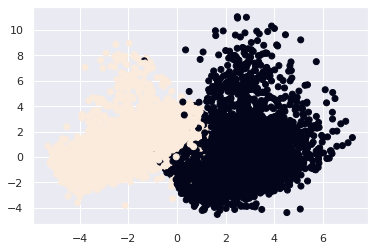

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(df.iloc[:,:-1])
#X[:,0]
plt.scatter(X[:,0],X[:,1],c= np.array(df.iloc[:,-1]))

## Train Test Split

In [ ]:
#train test split - not doing any validation split cause naive bayes algorithm does not has any hyperparameter to be tuned
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
x_train = X.iloc[:600,:]
x_test = X.iloc[600:,:]
y_train = Y[:600]
y_test = Y[600:]

# Data Learning using SKLearn Library

In [ ]:
from sklearn.svm import SVC
SVC_classifier = SVC(kernel= 'linear' )
SVC_classifier.fit(np.array(x_train), np.array(y_train));

In [ ]:
y_test_pred = SVC_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_test_pred))

[[9584   73]
 [ 181 7747]]


In [ ]:
from sklearn.model_selection import cross_validate
SVC_result = (cross_validate(SVC_classifier,X,Y,cv=7,return_train_score=True))
SVC_training_accuracy = SVC_result['train_score']
SVC_testing_accuracy = SVC_result['test_score']
print("training accuracy over 7 folds : {}".format(list(SVC_training_accuracy)))
print("average training accuracy : {}".format(np.mean(SVC_training_accuracy)))
print("")
print("testing accuracy over 7 folds :{}".format(list(SVC_testing_accuracy)))
print("average testing accuracy : {}".format(np.mean(SVC_testing_accuracy)))

training accuracy over 7 folds : [0.9895425675242189, 0.9893500994418426, 0.9900558157438891, 0.9896067235516777, 0.9896708795791365, 0.990376595881183, 0.9892866307415961]
average training accuracy : 0.9896984732090778

testing accuracy over 7 folds :[0.9903772132409546, 0.99153194765204, 0.9880677444187836, 0.9896073903002309, 0.9888375673595073, 0.9849884526558892, 0.9930689256834809]
average testing accuracy : 0.9894970344729838
